In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

from utils import count_arrival
from data import create_dataset

In [11]:
def f(t, a, b, c, d):
    return a * np.exp(b * t + c) + d

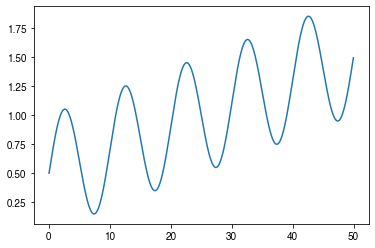

In [3]:
t = np.arange(0, 50, 0.02)
r = 0.5 * np.sin(np.pi / 5 * t) + 0.02 * t + 0.5
plt.plot(t, r)

/tmp/ipykernel_13924/2943786749.py:2: RuntimeWarning: divide by zero encountered in true_divide
  y = np.exp(1 / t)


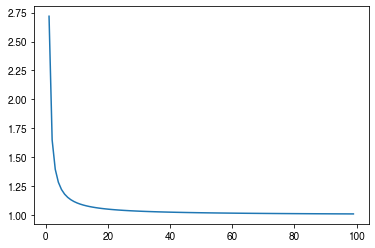

In [72]:
t = np.arange(100)
y = np.exp(1 / t)
plt.plot(t, y)

In [7]:
x = create_dataset(4000, 400)
x = np.log(x)
m = x.mean(axis=0)
t = np.arange(399)

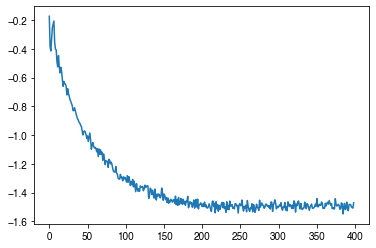

In [8]:
plt.plot(t, m)
# r = f(t, 4, 0.5, 0.1, 1)
# plt.plot(t, r)

In [13]:
params, params_covariance = optimize.curve_fit(f, t, m, p0=[0.1, -0.1, 0.1, 0.1])

/tmp/ipykernel_14982/3004093074.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * t + c) + d
/tmp/ipykernel_14982/3004093074.py:2: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(b * t + c) + d


In [14]:
params

array([ 0.38663235, -0.01902883,  1.18932608, -1.50162543])

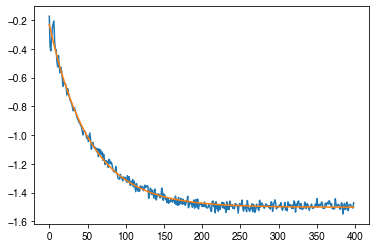

In [15]:
r = f(t, *params)
plt.plot(t, m)
plt.plot(t, r)

In [16]:
ris = x - r

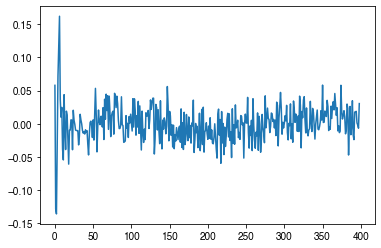

In [17]:
plt.plot(ris.mean(axis=0))

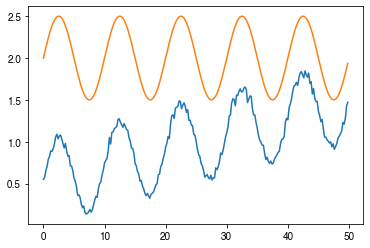

In [6]:
t, rate = count_arrival(x, 0.2, max_=50)
rate = rate.mean(axis=0)
true_rate = 0.5 * np.sin(np.pi / 5 * t) + 2
plt.plot(t, rate)
plt.plot(t, true_rate)

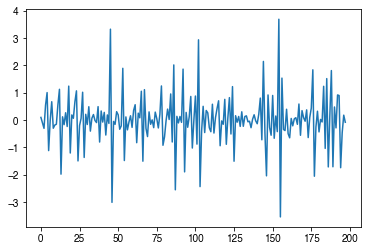

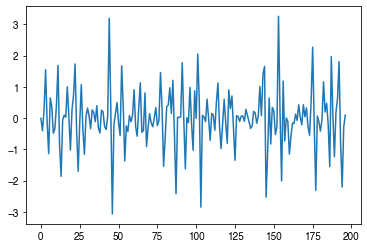

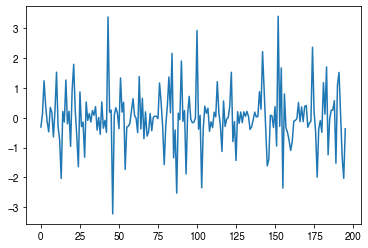

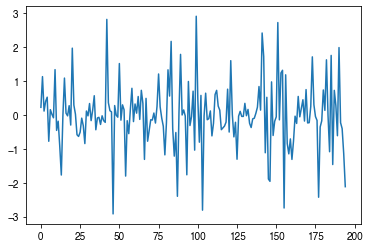

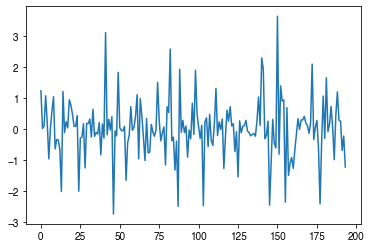

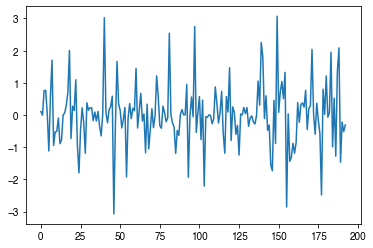

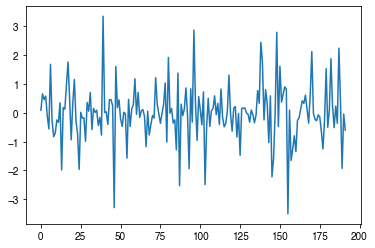

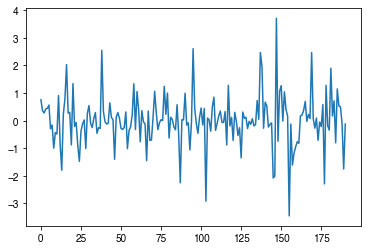

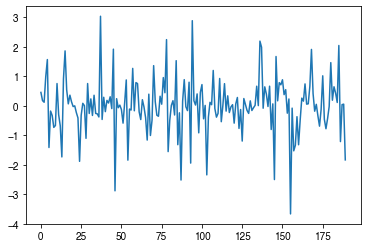

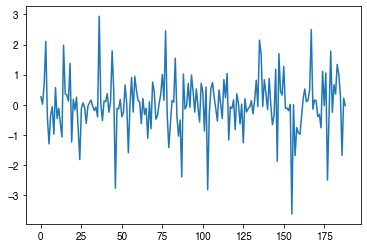

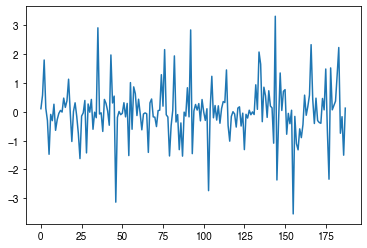

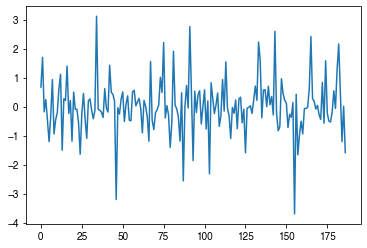

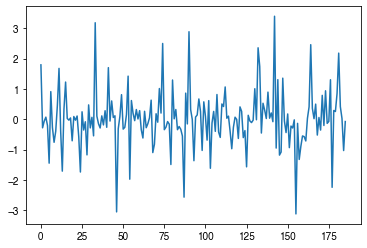

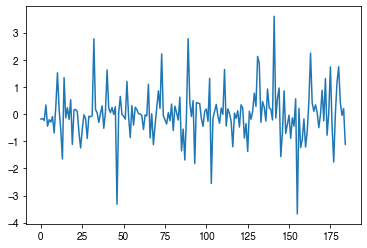

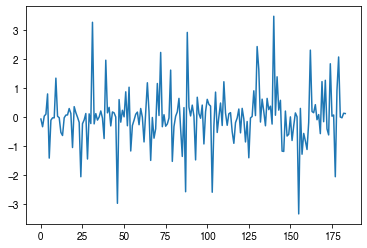

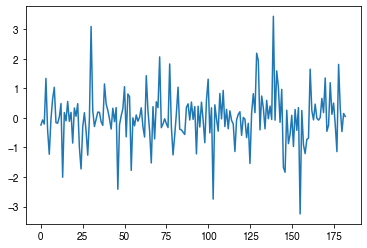

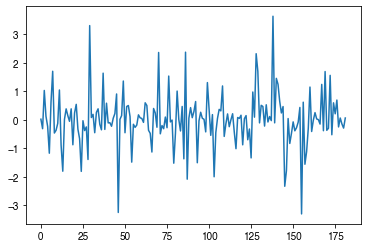

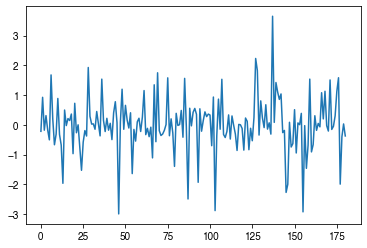

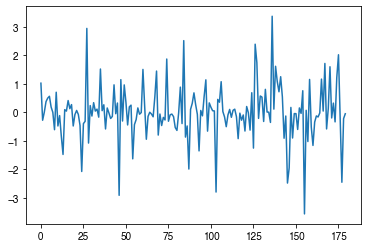

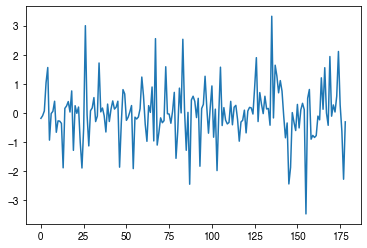

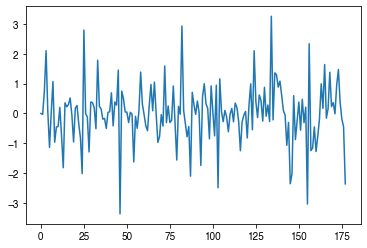

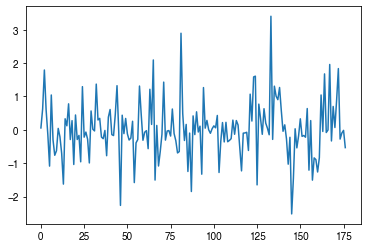

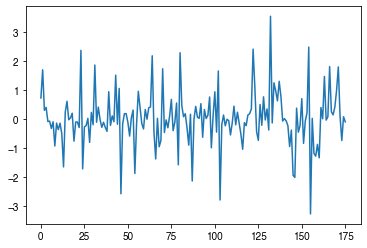

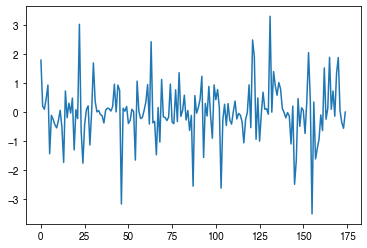

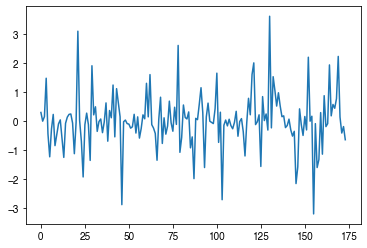

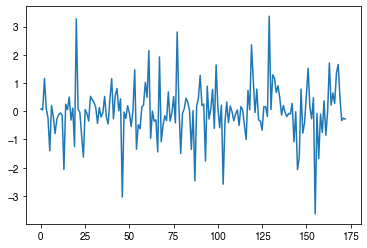

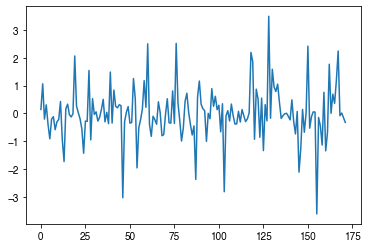

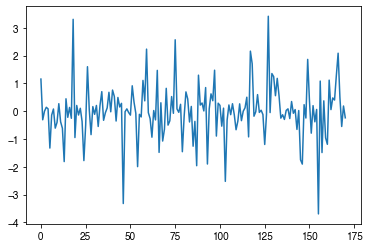

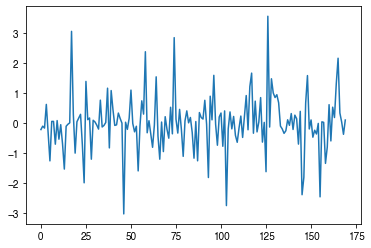

In [15]:
for period in range(1, 30):
    n, t = x.shape
    y = np.zeros([n, t - period])
    for j in range(period, t):
        y[:, j - period] = x[:, j] - x[:, j - period]

    #     mean = y.mean(axis=0)
    plt.plot(y[0])
    #     plt.ylim(-.4, .4)
    plt.show()